In [53]:
f = open("summary_O2_20221017_last.txt", "r")
txt = f.read()
print(txt) 


 4
    /*
 * --------------------------------------------------------------------------
 * BLISLAB 
 * --------------------------------------------------------------------------
 * Copyright (C) 2016, The University of Texas at Austin
 *
 * Redistribution and use in source and binary forms, with or without
 * modification, are permitted provided that the following conditions are
 * met:
 *  - Redistributions of source code must retain the above copyright
 *    notice, this list of conditions and the following disclaimer.
 *  - Redistributions in binary form must reproduce the above copyright
 *    notice, this list of conditions and the following disclaimer in the
 *    documentation and/or other materials provided with the distribution.
 *  - Neither the name of The University of Texas nor the names of its
 *    contributors may be used to endorse or promote products derived
 *    from this software without specific prior written permission.
 *
 * THIS SOFTWARE IS PROVIDED BY THE COP

In [54]:
separate = """    /*
 * --------------------------------------------------------------------------
 * BLISLAB 
 * --------------------------------------------------------------------------
 * Copyright (C) 2016, The University of Texas at Austin
 *
 * Redistribution and use in source and binary forms, with or without
 * modification, are permitted provided that the following conditions are
 * met:
 *  - Redistributions of source code must retain the above copyright
 *    notice, this list of conditions and the following disclaimer.
 *  - Redistributions in binary form must reproduce the above copyright
 *    notice, this list of conditions and the following disclaimer in the
 *    documentation and/or other materials provided with the distribution.
 *  - Neither the name of The University of Texas nor the names of its
 *    contributors may be used to endorse or promote products derived
 *    from this software without specific prior written permission.
 *
 * THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS
 * "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT
 * LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR
 * A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT
 * HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL,
 * SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT
 * LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE,
 * DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY
 * THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
 * (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
 * OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
 *
 *
 * bl_config.h
 *
 *
 * Purpose:
 * this header file contains configuration parameters.
 *
 * Todo:
 *
 *
 * Modification:
 *
 * 
 * */

#ifndef BLISLAB_CONFIG_H
#define BLISLAB_CONFIG_H

// Allow C++ users to include this header file in their source code. However,
// we make the extern "C" conditional on whether we're using a C++ compiler,
// since regular C compilers don't understand the extern "C" construct.
#ifdef __cplusplus
extern "C" {
#endif
"""

report = txt.replace("// #define DGEMM_KC 384","").split(separate)[1:]
print(report[0])


#define GEMM_SIMD_ALIGN_SIZE 32

#if 1
 
#define DGEMM_KC 4 //512
#define DGEMM_MC 4
#define DGEMM_NC 4
#define DGEMM_MR 4
#define DGEMM_NR 4
#endif

#define BL_MICRO_KERNEL bl_dgemm_ukr


// End extern "C" construct block.
#ifdef __cplusplus
}
#endif

#endif
Description:	my blislab 

Size: 31	Gflop/s: 6.45
Size: 32	Gflop/s: 6.92
Size: 33	Gflop/s: 5.87
Size: 63	Gflop/s: 7.17
Size: 64	Gflop/s: 7.4
Size: 65	Gflop/s: 6.73
Size: 95	Gflop/s: 7.16
Size: 96	Gflop/s: 7.35
Size: 97	Gflop/s: 6.87
Size: 127	Gflop/s: 7.23
Size: 128	Gflop/s: 7.4
Size: 129	Gflop/s: 7
Size: 159	Gflop/s: 7.25
Size: 160	Gflop/s: 7.41
Size: 161	Gflop/s: 7.1
Size: 191	Gflop/s: 7.3
Size: 192	Gflop/s: 7.44
Size: 193	Gflop/s: 7.16
Size: 223	Gflop/s: 7.33
Size: 224	Gflop/s: 7.46
Size: 225	Gflop/s: 7.2
Size: 255	Gflop/s: 7.34
Size: 256	Gflop/s: 7.49
Size: 257	Gflop/s: 7.22
Size: 287	Gflop/s: 7.32
Size: 288	Gflop/s: 7.48
Size: 289	Gflop/s: 7.23
Size: 319	Gflop/s: 7.32
Size: 320	Gflop/s: 7.5
Size: 321	Gflop/s: 7.23
Size: 351	G

In [56]:
KC=[]
MC=[]
NC=[]
MR=[]
NR=[]
aver=[]
size_s = []
speed_s= []

def report_ana(txt):
    
    # find parameter
    t=0
    t = txt.index("#define DGEMM_KC",t)
    t += 16
    t_nex = txt.index("\n",t)
    KC.append(int(txt[t:t_nex].split("//")[0]))
    
    t = txt.index("#define DGEMM_MC",t)
    t += 16
    t_nex = txt.index("\n",t)
    MC.append(int(txt[t:t_nex]))
    
    t = txt.index("#define DGEMM_NC",t)
    t += 16
    t_nex = txt.index("\n",t)
    NC.append(int(txt[t:t_nex]))
    
    t = txt.index("#define DGEMM_MR",t)
    t += 16
    t_nex = txt.index("\n",t)
    MR.append(int(txt[t:t_nex]))
    
    t = txt.index("#define DGEMM_NR",t)
    t += 16
    t_nex = txt.index("\n",t)
    NR.append(int(txt[t:t_nex]))
    
    # average
    t = txt.index("GeoMean  =",t)
    t += len("GeoMean  =")
    t_nex = txt.index("\n",t)
    aver.append(float(txt[t:t_nex]))
    
    # find performance
    dot = txt[:t-len("GeoMean  =")].split("\nSize:")[1:]
    size=[]
    speed=[]
    size_s.append(size)
    speed_s.append(speed)
    for i in range(len(dot)):
        # print(dot[i])
        part = dot[i].split("\tGflop/s:")
        size.append(int(part[0]))
        speed.append(float(part[1]))
        # print(size,speed)
    # print(dot)


# print(report[15])
# print("l=",len(report))
for i in range(len(report)):
    # print(i)
    report_ana(report[i])
    
    

In [57]:
# check same size ???
for j in range(len(size_s[0])):
    first = size_s[0][j]
    for i in range(len(size_s)):
        if (first != size_s[i][j]):
            assert False
print("same !")

same !


In [58]:
print(KC)
print(MC)
print(NC)
print(aver)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32, 32, 32, 32, 32, 64, 64, 64, 64, 64, 64, 64, 64, 64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 256, 256, 256, 256, 256, 256, 256, 256, 256, 512, 512, 512, 512, 512, 512, 512, 512, 512, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024]
[4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
[4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4, 8, 16, 32, 64, 128,

In [59]:
# performance varies with block size
speed_aver = {}
size_mn = {}
for i in range(len(KC)):
    if KC[i] not in speed_aver:
        speed_aver[KC[i]] = []
        size_mn[KC[i]] = []
    speed_aver[KC[i]].append(aver[i])
    size_mn[KC[i]].append(MC[i])
    

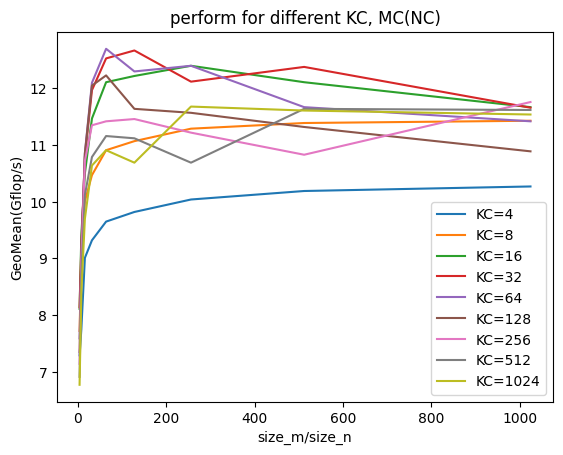

In [67]:
import matplotlib.pyplot as plt
legend = []
for key in size_mn.keys():
    legend.append("KC="+str(key))
    plt.plot(size_mn[key], speed_aver[key])
plt.legend(legend, loc ="lower right")
plt.xlabel('size_m/size_n')
plt.ylabel('GeoMean(Gflop/s)')
plt.title("perform for different KC, MC(NC)")
plt.show()


In [81]:
# performance of best block size varies with matrix size
def max_i_f(aver):
    max_i = 0
    max_v = aver[0]
    for i in range(len(aver)):
        if max_v < aver[i]:
            max_v = aver[i]
            max_i = i
    return max_i, max_v
best_i, best_speed = max_i_f(aver) 
print(best_i, best_speed)

40 12.7


In [82]:
print("best__")
print(KC[best_i],MC[best_i],NC[best_i])

best__
64 64 64


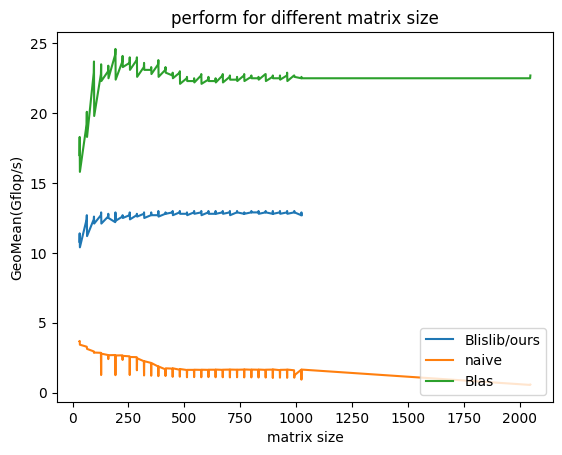

In [84]:
plt.plot(size_s[best_i],speed_s[best_i])
plt.plot(naive_data[1],naive_data[2])
plt.plot(Blas_data[1],Blas_data[2])
plt.legend(["Blislib/ours","naive", "Blas"], loc ="lower right")
plt.xlabel('matrix size')
plt.ylabel('GeoMean(Gflop/s)')
plt.title("perform for different matrix size")
plt.show()

In [63]:
# find peack GF for N=32,...
# of best performance
size_N = [32, 64, 128, 256, 511, 512, 513, 1023, 1024, 1025]#, 2047, 2048]  
size_best = size_s[best_i]
speed_best = speed_s[best_i]
for N in size_N:
    size_i = size_best.index(N)
    print(N, speed_best[size_i])

32 11.1
64 12.4
128 12.4
256 12.3
511 12.5
512 12.5
513 12.3
1023 12.4
1024 12.5
1025 12.3


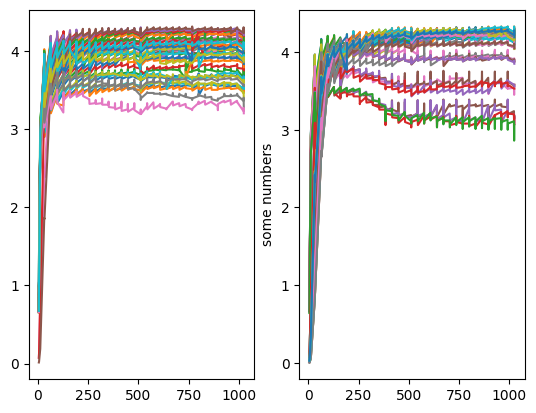

In [38]:
import matplotlib.pyplot as plt
# plt.figure()q
plt.subplot(1, 2, 1)
for i in range(len(size_s)//2):
    plt.plot(size_s[i], speed_s[i])
plt.subplot(1, 2, 2)
for i in range(len(size_s)//2, len(size_s)):
    plt.plot(size_s[i], speed_s[i])
plt.ylabel('some numbers')
plt.show()

In [68]:
# analysis naive and blas
f = open("summary_ref.txt", "r")
txt_ref = f.read()
print(txt_ref)

Description:	Naive, three-loop dgemm.

Size: 31	Gflop/s: 3.68
Size: 32	Gflop/s: 3.7
Size: 33	Gflop/s: 3.43
Size: 63	Gflop/s: 3.29
Size: 64	Gflop/s: 3.28
Size: 65	Gflop/s: 3.13
Size: 95	Gflop/s: 2.95
Size: 96	Gflop/s: 2.85
Size: 97	Gflop/s: 2.87
Size: 127	Gflop/s: 2.85
Size: 128	Gflop/s: 1.26
Size: 129	Gflop/s: 2.79
Size: 159	Gflop/s: 2.69
Size: 160	Gflop/s: 2.4
Size: 161	Gflop/s: 2.68
Size: 191	Gflop/s: 2.69
Size: 192	Gflop/s: 1.25
Size: 193	Gflop/s: 2.66
Size: 223	Gflop/s: 2.67
Size: 224	Gflop/s: 2.34
Size: 225	Gflop/s: 2.63
Size: 255	Gflop/s: 2.6
Size: 256	Gflop/s: 1.26
Size: 257	Gflop/s: 2.55
Size: 287	Gflop/s: 2.54
Size: 288	Gflop/s: 1.6
Size: 289	Gflop/s: 2.46
Size: 319	Gflop/s: 2.25
Size: 320	Gflop/s: 1.23
Size: 321	Gflop/s: 2.25
Size: 351	Gflop/s: 2.13
Size: 352	Gflop/s: 1.21
Size: 353	Gflop/s: 2.12
Size: 383	Gflop/s: 1.87
Size: 384	Gflop/s: 1.18
Size: 385	Gflop/s: 1.87
Size: 415	Gflop/s: 1.67
Size: 416	Gflop/s: 1.19
Size: 417	Gflop/s: 1.74
Size: 447	Gflop/s: 1.72
Size: 448	Gflo

In [77]:
naive, Blas = txt_ref.split("Description")[1:]

In [79]:
def extract(txt):
    # average
    t = 0
    t = txt.index("GeoMean  =",t)
    t += len("GeoMean  =")
    t_nex = txt.index("\n",t)
    Mean = float(txt[t:t_nex])
    
    # find performance
    dot = txt[:t-len("GeoMean  =")].split("\nSize:")[1:]
    size=[]
    speed=[]
    for i in range(len(dot)):
        # print(dot[i])
        part = dot[i].split("\tGflop/s:")
        size.append(int(part[0]))
        speed.append(float(part[1]))
    return Mean, size, speed
naive_data = extract(naive)
Blas_data = extract(Blas)
print(naive_data, Blas_data)

(1.67, [31, 32, 33, 63, 64, 65, 95, 96, 97, 127, 128, 129, 159, 160, 161, 191, 192, 193, 223, 224, 225, 255, 256, 257, 287, 288, 289, 319, 320, 321, 351, 352, 353, 383, 384, 385, 415, 416, 417, 447, 448, 449, 479, 480, 481, 511, 512, 513, 543, 544, 545, 575, 576, 577, 607, 608, 609, 639, 640, 641, 671, 672, 673, 703, 704, 705, 735, 736, 737, 767, 768, 769, 799, 800, 801, 831, 832, 833, 863, 864, 865, 895, 896, 897, 927, 928, 929, 959, 960, 961, 991, 992, 993, 1023, 1024, 1025, 2047, 2048], [3.68, 3.7, 3.43, 3.29, 3.28, 3.13, 2.95, 2.85, 2.87, 2.85, 1.26, 2.79, 2.69, 2.4, 2.68, 2.69, 1.25, 2.66, 2.67, 2.34, 2.63, 2.6, 1.26, 2.55, 2.54, 1.6, 2.46, 2.25, 1.23, 2.25, 2.13, 1.21, 2.12, 1.87, 1.18, 1.87, 1.67, 1.19, 1.74, 1.72, 1.13, 1.74, 1.64, 1.14, 1.69, 1.62, 1.1, 1.63, 1.63, 1.11, 1.64, 1.63, 1.1, 1.64, 1.63, 1.11, 1.64, 1.64, 1.1, 1.65, 1.63, 1.1, 1.64, 1.65, 1.09, 1.65, 1.64, 1.1, 1.64, 1.65, 1.09, 1.66, 1.64, 1.09, 1.65, 1.64, 1.08, 1.65, 1.63, 1.08, 1.64, 1.65, 1.05, 1.66, 1.61, 1.0